In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Training data:")
print(f"Number of examples: {x_train.shape[0]}")
print(f"Shape of examples: {x_train.shape[1:]}")
print(f"Datatype of examples: {x_train.dtype}")
print(f"Number of labels: {len(np.unique(y_train))}")
print()

Training data:
Number of examples: 60000
Shape of examples: (28, 28)
Datatype of examples: uint8
Number of labels: 10



# New Section

In [ ]:
print("Test data:")
print(f"Number of examples: {x_test.shape[0]}")
print(f"Shape of examples: {x_test.shape[1:]}")
print(f"Datatype of examples: {x_test.dtype}")
print(f"Number of labels: {len(np.unique(y_test))}")
print()

Test data:
Number of examples: 10000
Shape of examples: (28, 28)
Datatype of examples: uint8
Number of labels: 10



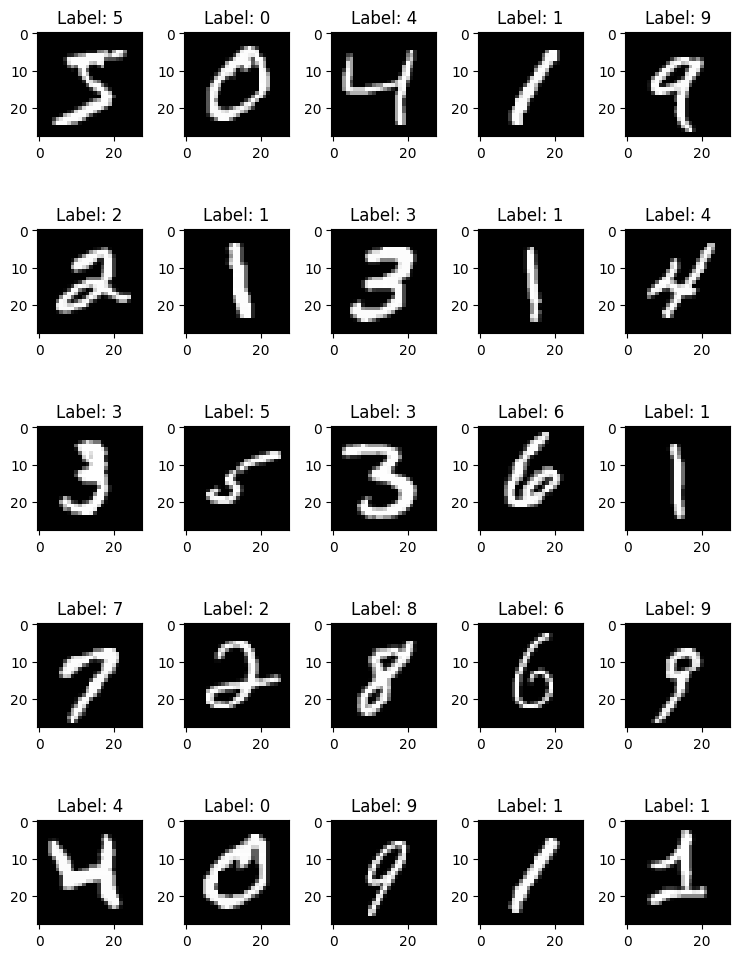

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5*num_cols,2*num_rows))
for i in range(num_images):
  ax = axes[i//num_cols, i%num_cols]
  ax.imshow(x_train[i], cmap='gray')
  ax.set_title(f"Label: {y_train[i]}")
plt.tight_layout()
plt.show()

In [ ]:
# Compute statistics of the pixels
print("Pixel statistics:")
print(f"Mean pixel value: {np.mean(x_train):.3f}")
print(f"Std. dev. of pixel values: {np.std(x_train):.3f}")
print()

Pixel statistics:
Mean pixel value: 33.318
Std. dev. of pixel values: 78.567



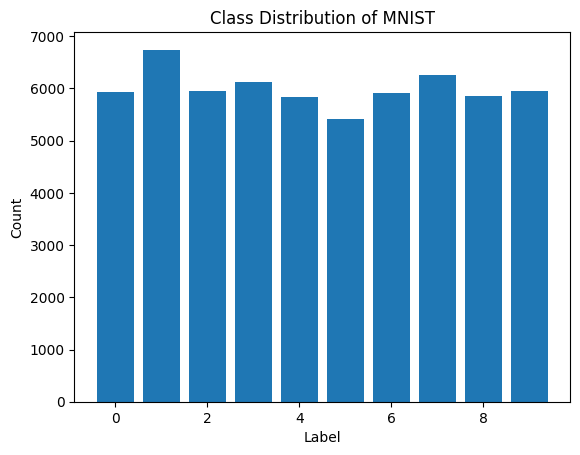

In [ ]:
# Visualize the label distribution
unique_labels, label_counts = np.unique(y_train, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Class Distribution of MNIST")
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0


model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])




In [ ]:
num_iterations = 2
bootstrapped_accs = []
for i in range(num_iterations):
  indices = np.random.choice(x_train.shape[0], size=x_train.shape[0], replace=True)
  x_train_bootstrap = x_train[indices]
  y_train_bootstrap = y_train[indices]

  model_1.compile(optimizer= tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

  model_1.fit(x_train_bootstrap, y_train_bootstrap, epochs=2, verbose=0)

  test_loss, test_acc = model_1.evaluate(x_test, y_test, verbose=0)
  bootstrapped_accs.append(test_acc)

  print(f"Iteration {i+1}: Test accuracy = {test_acc}")

Iteration 1: Test accuracy = 0.9815999865531921
Iteration 2: Test accuracy = 0.9853000044822693


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [ ]:
print(f"Average bootstrapped accuracy {np.mean(bootstrapped_accs)}")

Average bootstrapped accuracy 0.9834499955177307


In [ ]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])



In [ ]:
from sklearn.model_selection import KFold
num_folds = 2
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

cv_accs = []

for train_index, val_index in kfold.split(x_train):
  x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
  y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

  model_2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

  model_2.fit(x_train_fold, y_train_fold, epochs=2, validation_data=(x_val_fold, y_val_fold), verbose=0)

  test_loss, test_acc = model_2.evaluate(x_test, y_test, verbose=0)
  cv_accs.append(test_acc)

  print(f"Fold {len(cv_accs)}: Test accuracy = {test_acc}")


Fold 1: Test accuracy = 0.9797000288963318
Fold 2: Test accuracy = 0.983299970626831


In [ ]:
print(f"Average accuracy KFold {np.mean(cv_accs)}")

Average accuracy KFold 0.9814999997615814


In [ ]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


In [ ]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_3.fit(x_train, y_train, epochs=2, validation_split=0.2, verbose=1)
test_loss, test_acc = model_3.evaluate(x_test, y_test, verbose=0)
print(f"Holdout Testing: Test accuracy = {test_acc}")

Epoch 1/2
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2215 - accuracy: 0.9336 - val_loss: 0.0801 - val_accuracy: 0.9778
Epoch 2/2
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0753 - accuracy: 0.9771 - val_loss: 0.0578 - val_accuracy: 0.9835
Holdout Testing: Test accuracy = 0.9828000068664551


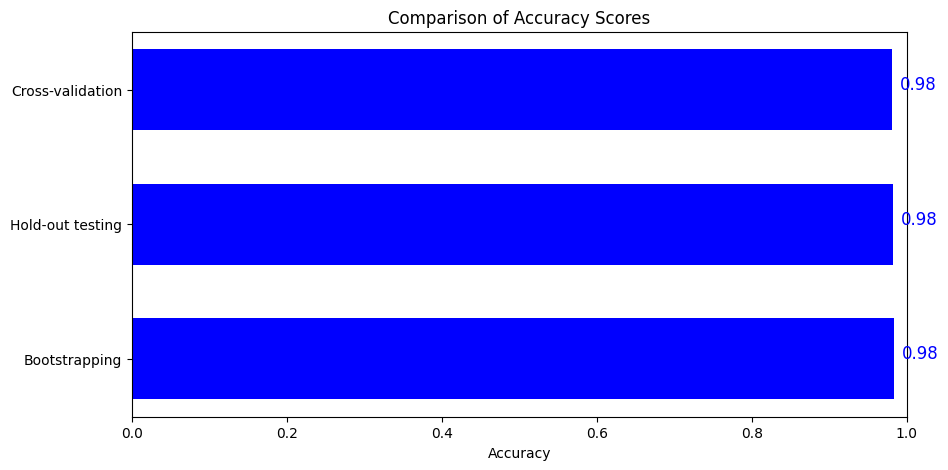

In [ ]:
labels = ['Cross-validation', 'Hold-out testing', 'Bootstrapping']
accuracy_values = [np.mean(cv_accs), test_acc, np.mean(bootstrapped_accs)]
fig, ax = plt.subplots(figsize=(10, 5))
y_pos = np.arange(len(labels))
rects1 = ax.barh(y_pos, accuracy_values, height=0.6, align='center', color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_xlim([0, 1.0])
ax.set_title('Comparison of Accuracy Scores')

# add labels on bars
for i, v in enumerate(accuracy_values):
    ax.text(v + 0.01, i, str(round(v, 2)), color='blue', fontsize=12)

plt.show()